
    1.Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
    2.Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
    3.Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
    4.Проанализируйте CTR с разбивкой по рекламной кампании.
    5.Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.
    6.Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.
    7.Посчитайте конверсию из клика в покупку.


## Опсиание данных
- ad_id – идентификатор объявления (рекламы)
- xyz_campaign_id – идентификатор рекламной кампании в базе компании X
- fb_campaign_id – идентификатор кампании в Facebook
- age – возрастная группа, которой показывалась реклама
- gender – пол тех, кому показывалась реклама
- interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
- impressions – число показов
- clicks – число кликов
- spent – сумма, которую компания потратила на показ объявления
- total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
- approved_conversion – количество людей, которые купили продукт после просмотра рекламы


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузим данные, проверим число наблюдений и столбцов, типы данных, наличие пропущенных значений

In [2]:
df = pd.read_csv('/home/oleg/python/forfun/KAG_conversion_data.zip')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.columns = df.columns.str.lower()
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.shape

(1143, 11)

In [5]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   impressions          1143 non-null   int64  
 7   clicks               1143 non-null   int64  
 8   spent                1143 non-null   float64
 9   total_conversion     1143 non-null   int64  
 10  approved_conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [7]:
df[['ad_id' ,'xyz_campaign_id', 'fb_campaign_id']].nunique()

ad_id              1143
xyz_campaign_id       3
fb_campaign_id      691
dtype: int64

### Вывод
Данные содержат 1143 записи о рекламных объявлениях трех уникальных рекламных компаний в базе компании Х. Пропущенных значений в данных нет.

### Построим график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения

In [8]:
log_fb_imp = df.groupby('fb_campaign_id', as_index=False)\
    .agg(total_impressions=('impressions', 'sum'))
log_fb_imp['total_impressions'] = np.log(log_fb_imp.total_impressions)
log_fb_imp

,fb_campaign_id,total_impressions
0,103916,8.902456
1,103917,9.790375
2,103920,6.541030
3,103928,9.035034
4,103929,7.557473
...,...,...
686,179977,13.937527
687,179978,13.365386
688,179979,11.928546
689,179981,13.580108


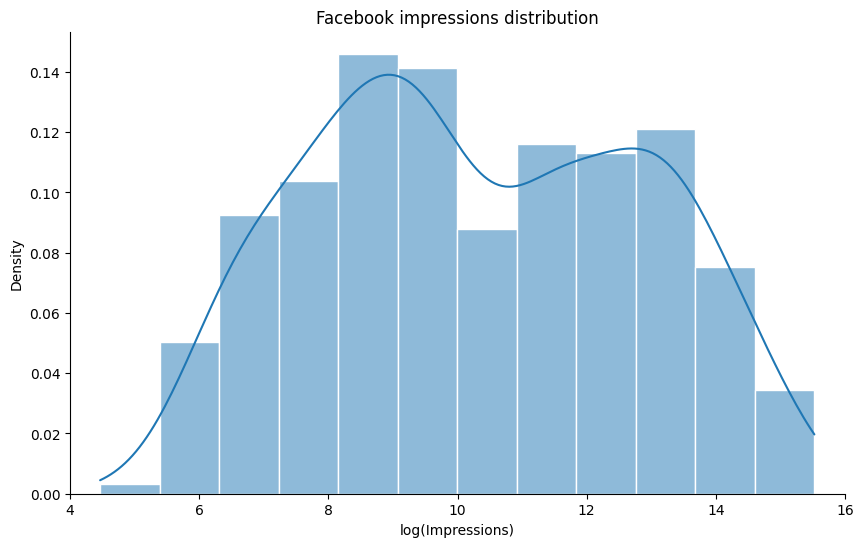

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.histplot(data=log_fb_imp, x='total_impressions', stat='density', kde=True)
ax.set_title('Facebook impressions distribution')
ax.set_xlabel('log(Impressions)')
ax.set_xlim(4, 16)
sns.despine()

### Вывод
- Распределение бимодальное
- Не является нормальным

### Создадим новую колонку c CTR. Посмотрим на описательные статистики и распределение.

In [10]:
df['ctr'] = df.clicks / df.impressions
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [11]:
df['ctr'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

### Проанализируйте CTR с разбивкой по рекламной кампании

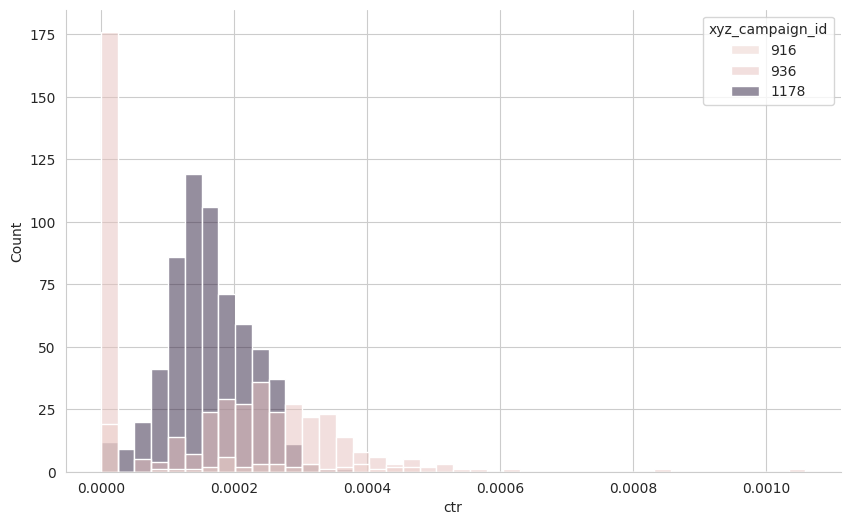

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x='ctr', hue='xyz_campaign_id')
sns.despine()

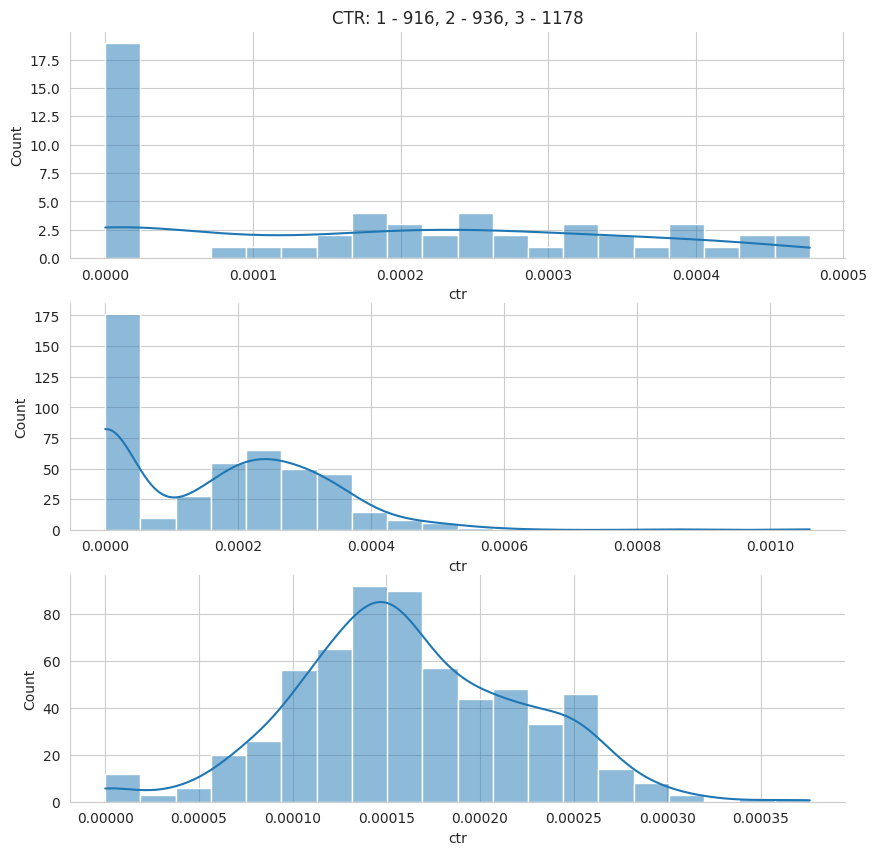

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(10,10))
sns.histplot(data=df.query("xyz_campaign_id == 916"), x='ctr', kde=True, bins=20, ax=ax[0])
sns.histplot(data=df.query("xyz_campaign_id == 936"), x='ctr', kde=True, bins=20, ax=ax[1])
sns.histplot(data=df.query("xyz_campaign_id == 1178"), x='ctr', kde=True, bins=20, ax=ax[2])
ax[0].set_title('CTR: 1 - 916, 2 - 936, 3 - 1178')
sns.despine()

На последнем графике показаны CTR для трех различных рекламных компаний. 

### Вывод
Исходя из графиков можно сделать вывод, что рекламная комапния с 'xyz_campaign_id' = 1178 является более эффективной.

### Посчитаем стоимость за клик пользователя по объявлению (CPC). Изучим полученные значения, используя меры центральной тенденции и меры изменчивости.

In [14]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


In [15]:
cpc = df.groupby('ad_id', as_index=False).agg({'clicks' : 'sum', 'spent' : 'sum'})
cpc.head()

,ad_id,clicks,spent
0,708746,1,1.43
1,708749,2,1.82
2,708771,0,0.00
3,708815,1,1.25
4,708818,1,1.29


In [16]:
df['cpc'] = cpc.spent / cpc.clicks
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [17]:
df.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [18]:
df_cpc = df.dropna()

In [19]:
df_cpc.groupby('xyz_campaign_id')['cpc'].describe()

,count,mean,std,min,25%,50%,75%,max
xyz_campaign_id,,,,,,,,
916,35.0,1.330350,0.231368,0.570,1.235000,1.347143,1.495,1.690000
936,288.0,1.364195,0.276096,0.180,1.271643,1.390000,1.541,2.013333
1178,613.0,1.572494,0.168953,1.145,1.442459,1.540000,1.700,2.212000


<AxesSubplot: xlabel='xyz_campaign_id', ylabel='cpc'>

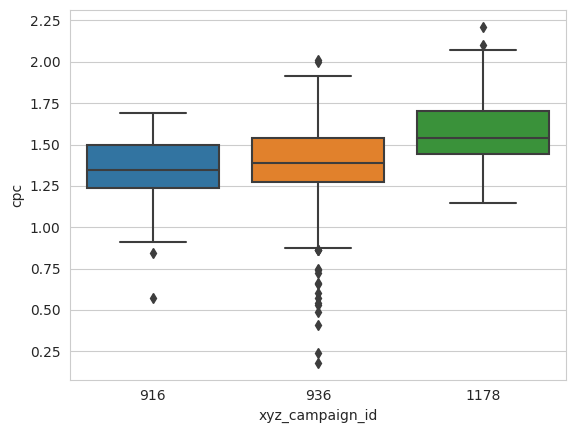

In [20]:
sns.boxplot(data=df_cpc, x='xyz_campaign_id', y='cpc')

In [21]:
iqr = df_cpc.groupby('xyz_campaign_id')['cpc'].quantile(q=0.75)\
- df_cpc.groupby('xyz_campaign_id')['cpc'].quantile(q=0.25)
iqr

xyz_campaign_id
916     0.260000
936     0.269357
1178    0.257541
Name: cpc, dtype: float64

Выше представлен межквартильный размах по CPC для трех рекламных компаний. Наибольший iqr у рекламной компании с xyz_campaign_id = 936, минимальный у компании с xyz_campaign_id = 1178.

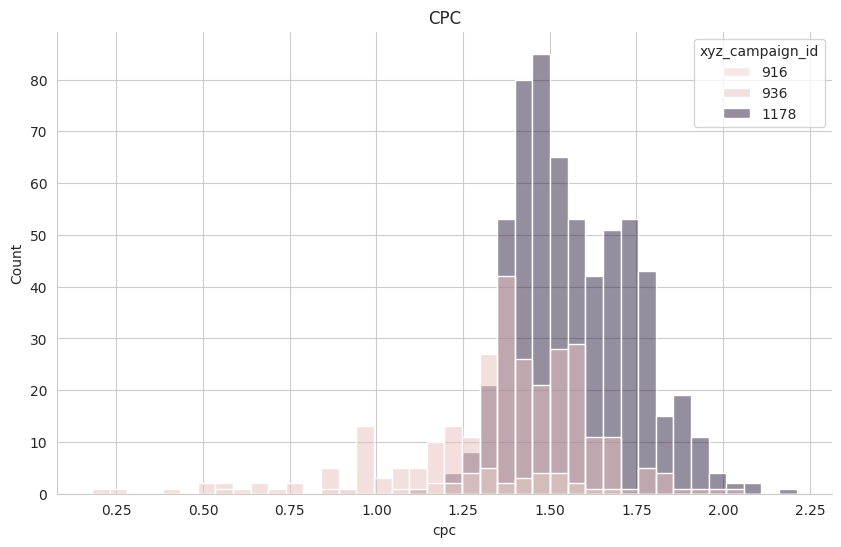

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df_cpc, x='cpc', hue='xyz_campaign_id')
ax.set_title('CPC')
sns.despine()

### Вывод
Из графика видно, что рекламная компания с xyz_campaign_id = 1178 имеет самую высокую стоимость с расчетом на 1 клик. Но при этом она является наиболее эффективной, исходя из соотношения кликов к показам.

### Визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления

In [23]:
df_cpc.groupby('gender')['cpc'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,463.0,1.428999,0.181373,0.41,1.367907,1.440,1.522588,2.013333
M,473.0,1.568208,0.256175,0.18,1.453784,1.599,1.734625,2.212000


In [24]:
df_cpc.groupby('gender')['cpc'].median()

gender
F    1.440
M    1.599
Name: cpc, dtype: float64

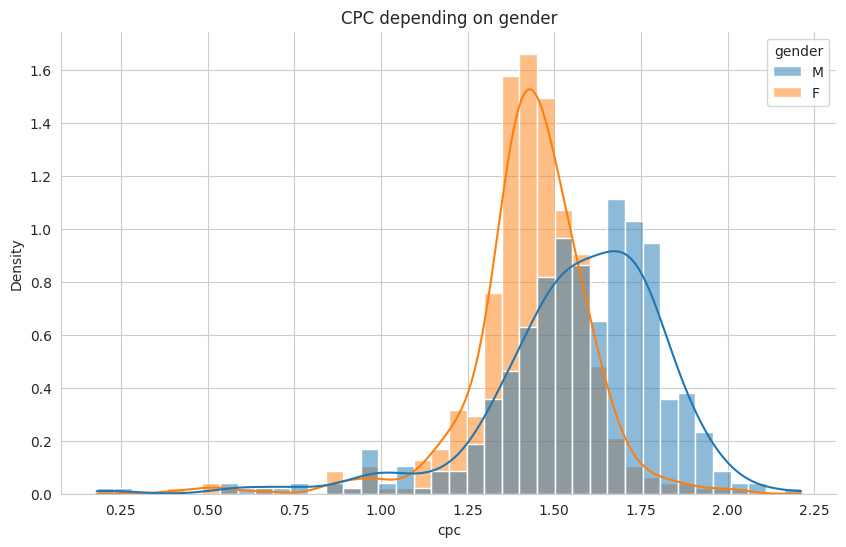

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df_cpc, x='cpc', hue='gender', stat='density', kde=True)
ax.set_title('CPC depending on gender')
sns.despine()

### Вывод
На CPC для рекламы ориентированной на мужчин в среднем выше, чем для женщин. Можно сделать вывод, что женщины чаще мужчин кликают по рекламе, поэтому реклама таргетированная на мужчин обходиться дороже.

### Посчитаем конверсию из клика в покупку

In [26]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [27]:
cr = df.groupby('ad_id', as_index=False).agg({'clicks' : 'sum', 'approved_conversion' : 'sum'})
cr.head()

,ad_id,clicks,approved_conversion
0,708746,1,1
1,708749,2,0
2,708771,0,0
3,708815,1,0
4,708818,1,1


In [28]:
df['cr'] = cr.approved_conversion / cr.clicks
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc,cr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,1.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29,1.0


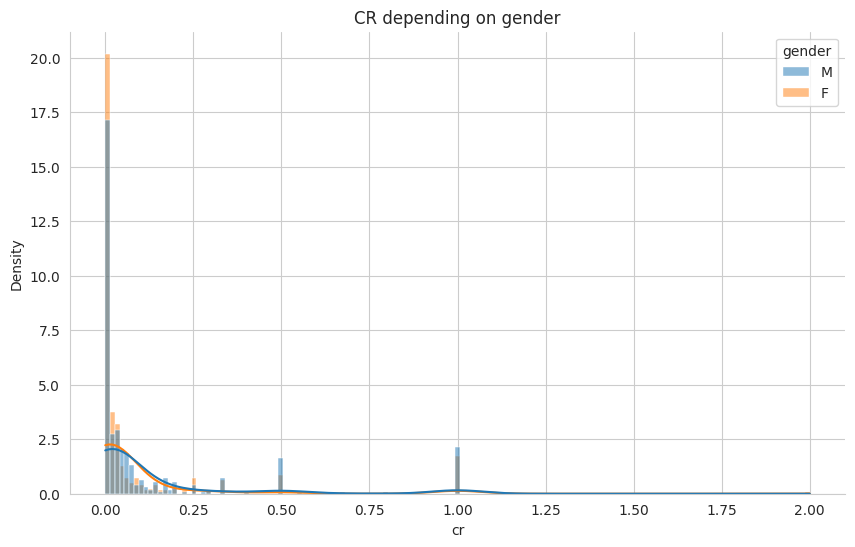

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df.dropna(), x='cr', hue='gender', stat='density', kde=True)
ax.set_title('CR depending on gender')
sns.despine()

In [30]:
df.dropna().groupby('gender')['cr'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,463.0,0.094444,0.241890,0.0,0.0,0.007407,0.041241,2.0
M,473.0,0.123308,0.251401,0.0,0.0,0.022727,0.076923,1.0


In [31]:
df.dropna().groupby('gender')['cr'].median()

gender
F    0.007407
M    0.022727
Name: cr, dtype: float64

### Вывод
Из графика и из описательных статистик видно, что конверсия у мужчин больше, чем у женщин.